In [94]:
import pandas as pd
import pathlib
import ipytest
ipytest.autoconfig()
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os
import sys 
sys.path.append("/net/data.isilon/ag-cherrmann/nschmidt/project/parse_xml_for_VAE/xml_data/")
sys.path.append("/net/data.isilon/ag-cherrmann/nschmidt/project/parse_xml_for_VAE/xml_data_t/")
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import umap
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [ ]:
path_to_xml = "/net/data.isilon/ag-cherrmann/nschmidt/project/parse_xml_for_VAE/train_xml_data/"
path_to_xml_t = "/net/data.isilon/ag-cherrmann/nschmidt/project/parse_xml_for_VAE/train_xml_data_t/"

def read_hdf5_to_df(filepath: str):
    if not os.path.exists(filepath):
        print(f"File {filepath} does not exist")
        return None
    try:
        df = pd.read_hdf(filepath, key='atlas_data')
        return df 
    except Exception as e:
        print(f"Error reading {filepath}: {e}")
        return None

def read_hdf5_to_df_t(filepath: str):
    if not os.path.exists(filepath):
        print(f"File {filepath} does not exist")
        return None
    try:
        return pd.read_hdf(filepath, key='atlas_data_t')
    except Exception as e:
        print(f"Error reading {filepath}: {e}")
        return None

paths = list(pathlib.Path(path_to_xml).glob("*.h5"))
paths_t = list(pathlib.Path(path_to_xml_t).glob("*.h5"))

test = read_hdf5_to_df(str(paths[0]))
test_copy = test.loc[:, (slice(None), 'Vgm')]
test_copy

Filename            4088_01_MR_T1w_MPR 4065_01_MR_T1w_MPR 1015_01_MR_T1w_MPR  \
Volume                             Vgm                Vgm                Vgm   
lStriatum                     8.041738           7.719654          10.470575   
lGloPal                       0.176577           0.193225           0.289341   
lTha                          3.834673           3.302653           3.899039   
lAntCerebLI_II                0.044373           0.049537           0.071017   
lAntCerebLIII                 0.611916           0.540921           0.746605   
lAntCerebLIV                  1.830386           1.724505           2.033361   
lAntCerebLV                   3.367833           3.392738           4.502533   
lSupPostCerebLVI              6.283853           7.050177           8.823246   
lSupPostCerebCI               8.937315          11.150214          11.400015   
lSupPostCerebCII              5.820112           6.933566           6.737623   
lSupPostCerebLVIIB            3.170457           3.586281           3.866960   
lInfPostCerebLVIIIA           4.145764           4.899097           5.578162   
lInfPostCerebLVIIIB           2.511861           2.810705           3.366067   
lInfPostCerebLIX              2.634712           2.338832           3.004745   
lInfPostCerebLX               0.494594           0.550490           0.573413   
lAntCerebWM                   0.532622           0.514114           0.788206   
lAmy                          1.240615           1.271220           1.502109   
lHCA1                         0.777797           0.801770           0.809429   
lSub                          0.267911           0.273468           0.313224   
lFor                          0.107925           0.048999           0.051931   
lCA4                          0.683987           0.722740           0.729093   
lCA2_3                        0.137834           0.136779           0.132257   
lStratum                      0.543025           0.536311           0.564684   
lFimbra                       0.063162           0.053049           0.047684   
lMamBody                      0.014139           0.015344           0.022124   
lAlveus                       0.353407           0.350380           0.336706   
rStriatum                     8.594517           7.904274          10.826703   
rGloPal                       0.201966           0.196123           0.317121   
rTha                          4.168431           3.280840           4.217743   
rAntCerebLI_II                0.072073           0.076868           0.094674   
rAntCerebLIII                 0.715883           0.664135           0.761646   
rAntCerebLIV                  1.541894           1.479606           1.779911   
rAntCerebLV                   3.424633           3.332152           4.285919   
rSupPostCerebLVI              7.195560           7.520147           9.348168   
rSupPostCerebCI               8.783563          10.584633          10.766813   
rSupPostCerebCII              5.880740           7.855801           6.953075   
rSupPostCerebLVIIB            3.636411           4.281782           4.268206   
rInfPostCerebLVIIIA           3.452576           3.668419           4.443107   
rInfPostCerebLVIIIB           2.602746           2.491569           3.282309   
rInfPostCerebLIX              2.546129           2.371591           2.913235   
rInfPostCerebLX               0.453773           0.553162           0.590847   
rAntCerebWM                   0.573413           0.480377           0.864855   
rAmy                          1.252937           1.240454           1.463844   
rHCA1                         0.844893           0.923868           0.854133   
rSub                          0.264689           0.274912           0.286244   
rFor                          0.137910           0.088073           0.080902   
rCA4                          0.669320           0.732148           0.693409   
rCA2_3                        0.162229           0.178403           0.157849   


In [17]:
def plot_distribution(paths: list, measurement: str):
    total_fig = make_subplots(rows=len(paths), cols=1)
    total_fig_data = []

    for path in paths: 
        df = read_hdf5_to_df(str(path))
        df = df.loc[:, (slice(None), measurement)]
        
        df_t = df.T

        rois = df_t.columns
  
        fig = go.Figure()

        for roi in rois:
            fig.add_trace(go.Box(y=df_t[roi], name=roi))

        fig.update_layout(boxmode='group') #to group boxes of the same type.
        fig.update_traces(boxpoints='outliers', jitter=.3)
        
        total_fig_data.append(fig)
    
    for idx, fig in enumerate(total_fig_data):
        for trace in fig.data:
            total_fig.add_trace(trace, row=idx+1, col=1)
    
    total_fig.update_layout(height=600)
    total_fig.show()

plot_distribution([paths[0]], measurement="Vgm")


In [33]:
def analyze_df(df: pd.DataFrame) -> dict: 
    data_dict = {}

    df_t = df.T.copy()
    rois = df_t.columns
    for roi in rois:
        roi_data = df_t[roi]
        
        data_dict[roi] = {
            "mean":roi_data.mean(),
            "median":roi_data.median(),
            "quantiles": roi_data.quantile(q=[0.25, 0.5, 0.75]).to_list(),
            "min": roi_data.min(), 
            "max": roi_data.max(),
            "var": roi_data.var()
        }
        
    return data_dict

def analyze_features(paths: list):
    all_data = {}
    for path in paths: 
        path_str = str(path)
        df = read_hdf5_to_df(path).copy()
        all_data[path_str] = {}

        for measurement in ["Vgm"]:
            df_m = df.copy().loc[:, (slice(None), measurement)]
            if df_m.shape[0] == 0:
                continue

            data_dict = analyze_df(df_m)
            all_data[path_str] = {measurement: data_dict}
    return all_data

In [34]:
all_data = analyze_features(paths=paths)

atlas = "neuromorphometrics"
measurement = "Vgm"

path = f"/net/data.isilon/ag-cherrmann/nschmidt/project/parse_xml_for_VAE/train_xml_data/Aggregated_{atlas}.h5"

rois = [roi for roi in all_data[path][measurement]]
variances = [all_data[path][measurement][roi]["var"] for roi in rois]

sort_index = np.argsort(variances)
sorted_rois = np.array(rois)[sort_index].tolist()
print(f"Variances: {variances}")
print(f"ROIs: {rois}")
print(f"Sorted ROIs (ascending): {sorted_rois}")

Variances: [0.003763529121187225, 0.003661745545161782, 0.0022399410083550975, 0.0027063220697964747, 0.012435413972163018, 0.013452200504797108, 0.20123427706951244, 0.13949204804266624, 0.14234876139671337, 23.990193668925585, 24.2581098265989, 0.05332226585464563, 0.05859116970164267, 21.689077145197093, 20.227637391319227, 0.004906969175442202, 0.11526072655241719, 0.1038083143352326, 0.0002859625916246924, 0.00011460771151545758, 0.04970286364935325, 0.05651902031427041, 0.008322766669683051, 0.009055058699585429, 0.2738612895913314, 0.3093577220785691, 0.7955494428193569, 0.6930060657792418, 0.016678259125041214, 0.016059710353533124, 0.0, 0.0, 0.0017568461810562603, 0.24701167632015872, 0.049024071882907375, 0.0815239127760824, 0.003645568669929034, 0.0034991448796211967, 0.3322501085755766, 0.40369825753503663, 0.2459903355039686, 0.23779540199785892, 0.0576740991436916, 0.04867280187289491, 1.4947526934959348, 1.1314886712362517, 0.18400620224627842, 0.18719467660714267, 0.293

In [36]:
def normalize_and_scale_df(df: pd.DataFrame) -> pd.DataFrame:
    # Normalizes the columns (patient volumes) by Min-Max Scaling and scales the rows (ROIs) with Z-transformation.

    df_copy = df.copy()
    column_sums = df_copy.sum()
    
    # Apply the formula: ln((10000*value)/sum_values + 1) "Log transformation"
    # Alternatively for Min-Max Scaling: df_copy/df_copy.max() - Problem: Some rows have std = 0
    transformed_df = np.log((10000 * df_copy) / column_sums + 1)
    
    norm_copy = transformed_df.copy()

    cols = norm_copy.columns.get_level_values(-1).tolist() # Select lowest level of Multiindex (Measurements: Vgm, Vwm, Vcsf)
    unique_cols = list(set(cols))

    for col_type in unique_cols:
        cols_to_scale = [col for col in norm_copy.columns if col[-1] == col_type]

        # Scale the selected columns per row
        scaled = norm_copy[cols_to_scale].apply(
            lambda row: (row - row.mean()) / row.std() if row.std() > 0 else pd.Series(0.0, index=row.index),
            axis=1
        )
        
        norm_copy.loc[:, cols_to_scale] = scaled
        
    return norm_copy

def flatten_array(df: pd.DataFrame) -> np.ndarray:
    # Converts data frame to flattened array. 
    array = df.to_numpy()
    flat_array = array.flatten()
    return flat_array

In [41]:
path = "/net/data.isilon/ag-cherrmann/nschmidt/project/parse_xml_for_VAE/train_xml_data/Aggregated_neuromorphometrics.h5"

df = read_hdf5_to_df(filepath=path)

df_norm = normalize_and_scale_df(df=df)

data_overview = pd.read_csv("./relevant_metadata/training_metadata.csv")
data_overview = data_overview.drop(columns=['Unnamed: 0'])
data_overview = data_overview[["Filename", "Dataset", "Diagnosis" , "Age", "Sex", "Usage_original", "Sex_int"]]

skipped_files = []

subjects = []

all_file_names = df_norm.columns

for index, row in data_overview.iterrows():
        subject = {} 
        
        if not row["Filename"] in all_file_names:
            skipped_files.append(row["Filename"])
            continue
        
        file_name = row["Filename"]

        patient_data = data[file_name]
        flat_patient_data = flatten_array(patient_data).tolist()

        subject["name"] = file_name
        subject["measurements"] = flat_patient_data
        subject["labels"] = {}

        # Store Subject in our list
        subjects.append(subject)

print(len(skipped_files))

0


2178


/net/data.isilon/ag-cherrmann/nschmidt/project/miniconda3/envs/bp_nschmidt_prep/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



2178


/net/data.isilon/ag-cherrmann/nschmidt/project/miniconda3/envs/bp_nschmidt_prep/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



2178


/net/data.isilon/ag-cherrmann/nschmidt/project/miniconda3/envs/bp_nschmidt_prep/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



2178


/net/data.isilon/ag-cherrmann/nschmidt/project/miniconda3/envs/bp_nschmidt_prep/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



2178


/net/data.isilon/ag-cherrmann/nschmidt/project/miniconda3/envs/bp_nschmidt_prep/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



2178


/net/data.isilon/ag-cherrmann/nschmidt/project/miniconda3/envs/bp_nschmidt_prep/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



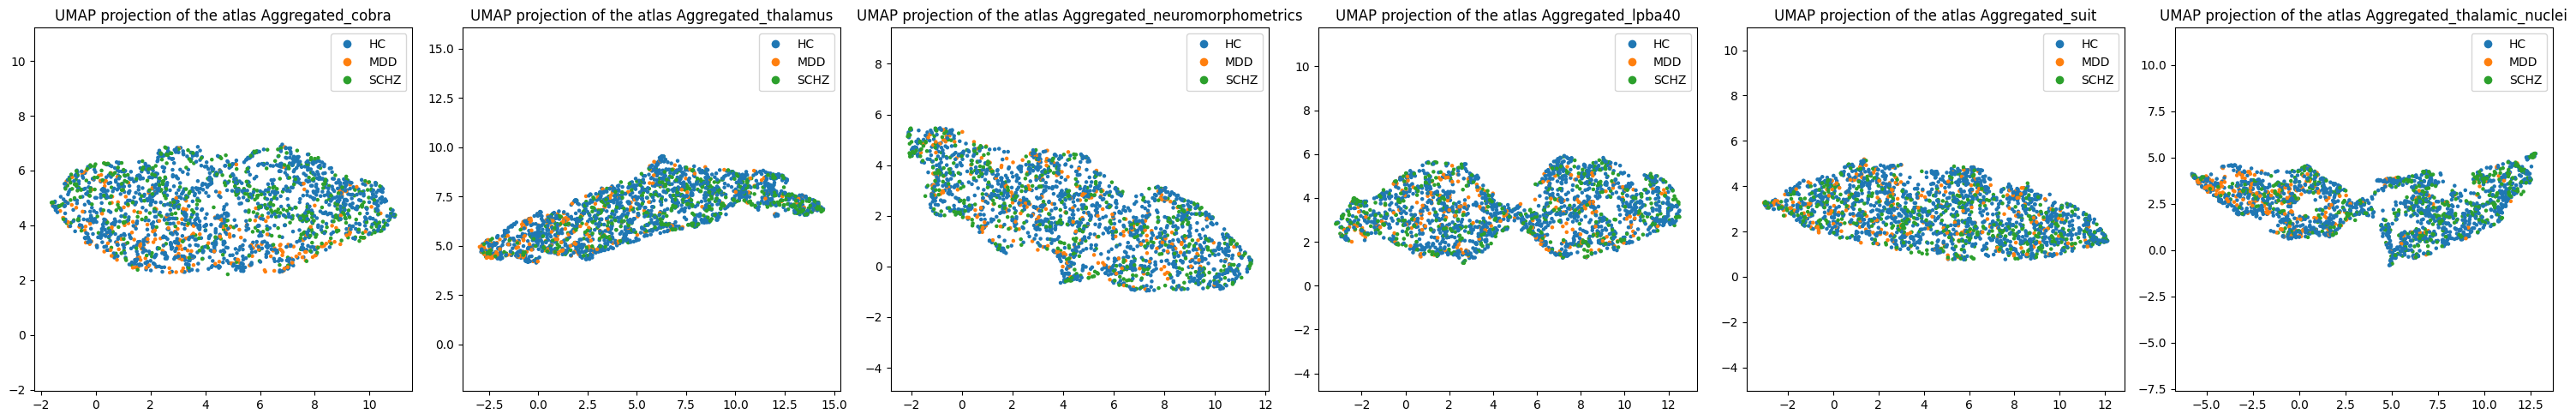

In [ ]:
def get_all_data(directory: str, ext: str = "h5") -> list:
    data_paths = list(pathlib.Path(directory).rglob(f"*.{ext}"))
    return data_paths

data_paths = get_all_data(directory="./train_xml_data", ext="h5")

data_overview = pd.read_csv("./relevant_metadata/training_metadata.csv")
data_overview = data_overview.drop(columns=['Unnamed: 0'])
data_overview = data_overview[["Filename", "Dataset", "Diagnosis" , "Age", "Sex", "Usage_original", "Sex_int"]].set_index("Filename")

dfs = []
names = []

for path in data_paths:
    df = read_hdf5_to_df(str(path))
    df = df.loc[:, (slice(None), "Vgm")]

    sorted_df = df.copy().sort_index(axis=1).T

    dfs.append(sorted_df)
    names.append(path.stem)

fig, axs = plt.subplots(nrows=1, ncols=len(dfs), figsize=(5*len(dfs), 5))

if len(dfs) == 1:
    axs = [axs]

for idx, (df, name) in enumerate(zip(dfs, names)):
    reducer = umap.UMAP()
    clean_df = df.copy()
    
    filenames = clean_df.index.get_level_values(0)

    diagnoses = []
    for filename in filenames:
        if filename in list(data_overview.index):
            diagnoses.append(data_overview.loc[filename, 'Diagnosis'])
        else:
            diagnoses.append('Unknown')

    print(len(diagnoses))
    
    color_map = {"HC": 0, "MDD": 1, "SCHZ": 2}
    colors = [sns.color_palette()[color_map.get(d, 3)] for d in diagnoses]

    embedding = reducer.fit_transform(clean_df.values)
    
    axs[idx].set_aspect('equal', 'datalim')
    axs[idx].set_title(f'UMAP projection of the atlas {name}', fontsize=12)

    axs[idx].scatter(
        embedding[:,0],
        embedding[:,1],
        c=colors,
        s=5
    )

    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor=sns.color_palette()[0], label='HC', markersize=8),
        Line2D([0], [0], marker='o', color='w', markerfacecolor=sns.color_palette()[1], label='MDD', markersize=8),
        Line2D([0], [0], marker='o', color='w', markerfacecolor=sns.color_palette()[2], label='SCHZ', markersize=8)
    ]
    axs[idx].legend(handles=legend_elements, loc='best')

plt.tight_layout()
plt.show()

2178


/net/data.isilon/ag-cherrmann/nschmidt/project/miniconda3/envs/bp_nschmidt_prep/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



2178


/net/data.isilon/ag-cherrmann/nschmidt/project/miniconda3/envs/bp_nschmidt_prep/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



2178


/net/data.isilon/ag-cherrmann/nschmidt/project/miniconda3/envs/bp_nschmidt_prep/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



2178


/net/data.isilon/ag-cherrmann/nschmidt/project/miniconda3/envs/bp_nschmidt_prep/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



2178


/net/data.isilon/ag-cherrmann/nschmidt/project/miniconda3/envs/bp_nschmidt_prep/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



2178


/net/data.isilon/ag-cherrmann/nschmidt/project/miniconda3/envs/bp_nschmidt_prep/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



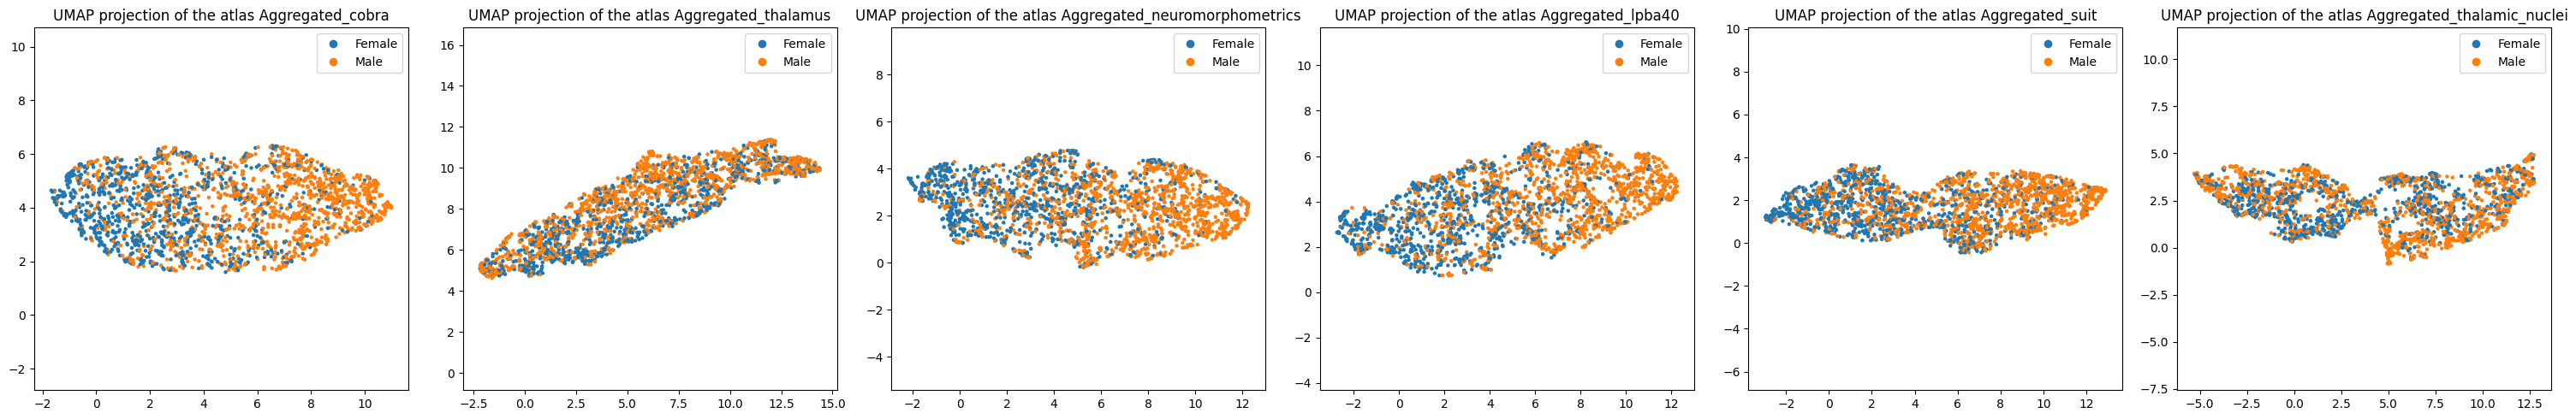

In [ ]:
def get_all_data(directory: str, ext: str = "h5") -> list:
    data_paths = list(pathlib.Path(directory).rglob(f"*.{ext}"))
    return data_paths

data_paths = get_all_data(directory="./train_xml_data", ext="h5")

data_overview = pd.read_csv("./relevant_metadata/training_metadata.csv")
data_overview = data_overview.drop(columns=['Unnamed: 0'])
data_overview = data_overview[["Filename", "Dataset", "Diagnosis" , "Age", "Sex", "Usage_original", "Sex_int"]].set_index("Filename")

dfs = []
names = []

for path in data_paths:
    df = read_hdf5_to_df(str(path))
    df = df.loc[:, (slice(None), "Vgm")]

    sorted_df = df.copy().sort_index(axis=1).T

    dfs.append(sorted_df)
    names.append(path.stem)

fig, axs = plt.subplots(nrows=1, ncols=len(dfs), figsize=(5*len(dfs), 5))

if len(dfs) == 1:
    axs = [axs]

for idx, (df, name) in enumerate(zip(dfs, names)):
    reducer = umap.UMAP()
    clean_df = df.copy()
    
    filenames = clean_df.index.get_level_values(0)

    sexes = []
    for filename in filenames:
        if filename in list(data_overview.index):
            sexes.append(data_overview.loc[filename, 'Sex'])
        else:
            sexes.append('Unknown')

    print(len(sexes))
    
    color_map = {"Female": 0, "Male": 1}
    colors = [sns.color_palette()[color_map.get(s, 3)] for s in sexes]

    embedding = reducer.fit_transform(clean_df.values)
    
    axs[idx].set_aspect('equal', 'datalim')
    axs[idx].set_title(f'UMAP projection of the atlas {name}', fontsize=12)

    axs[idx].scatter(
        embedding[:,0],
        embedding[:,1],
        c=colors,
        s=5
    )

    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor=sns.color_palette()[0], label='Female', markersize=8),
        Line2D([0], [0], marker='o', color='w', markerfacecolor=sns.color_palette()[1], label='Male', markersize=8),
    ]
    axs[idx].legend(handles=legend_elements, loc='best')

plt.tight_layout()
plt.show()

/net/data.isilon/ag-cherrmann/nschmidt/project/miniconda3/envs/bp_nschmidt_prep/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/net/data.isilon/ag-cherrmann/nschmidt/project/miniconda3/envs/bp_nschmidt_prep/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/net/data.isilon/ag-cherrmann/nschmidt/project/miniconda3/envs/bp_nschmidt_prep/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/net/data.isilon/ag-cherrmann/nschmidt/project/miniconda3/envs/bp_nschmidt_prep/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/net

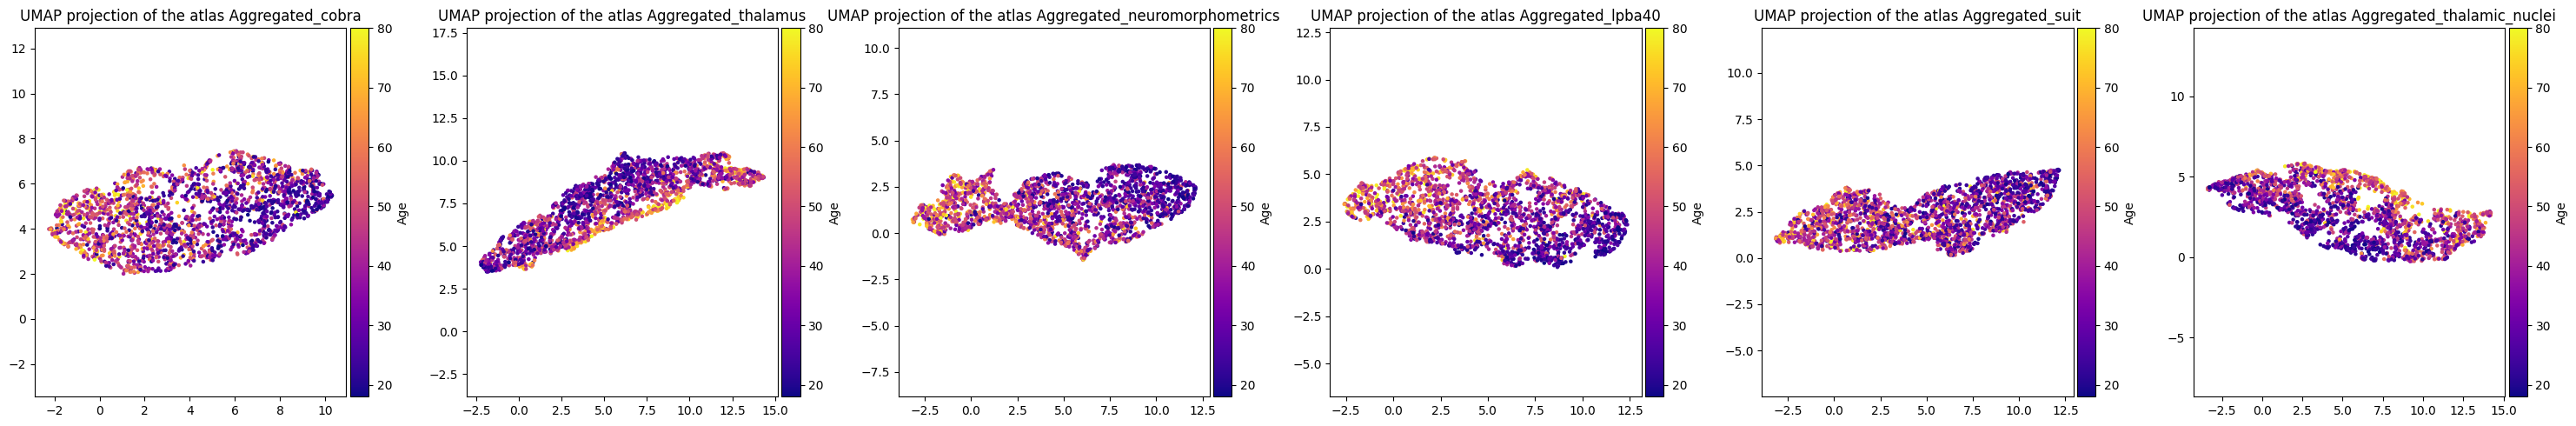

In [100]:
def get_all_data(directory: str, ext: str = "h5") -> list:
    data_paths = list(pathlib.Path(directory).rglob(f"*.{ext}"))
    return data_paths

data_paths = get_all_data(directory="./train_xml_data", ext="h5")

data_overview = pd.read_csv("./relevant_metadata/training_metadata.csv")
data_overview = data_overview.drop(columns=['Unnamed: 0'])
data_overview = data_overview[["Filename", "Dataset", "Diagnosis" , "Age", "Sex", "Usage_original", "Sex_int"]].set_index("Filename")

dfs = []
names = []

for path in data_paths:
    df = read_hdf5_to_df(str(path))
    df = df.loc[:, (slice(None), "Vgm")]

    sorted_df = df.copy().sort_index(axis=1).T

    dfs.append(sorted_df)
    names.append(path.stem)

fig, axs = plt.subplots(nrows=1, ncols=len(dfs), figsize=(5*len(dfs), 5))

if len(dfs) == 1:
    axs = [axs]

for idx, (df, name) in enumerate(zip(dfs, names)):
    reducer = umap.UMAP()
    clean_df = df.copy()
    
    filenames = clean_df.index.get_level_values(0)

    ages = []
    for filename in filenames:
        if filename in list(data_overview.index):
            ages.append(data_overview.loc[filename, 'Age'])
        else:
            ages.append(float('nan'))
    
    ages = pd.to_numeric(ages, errors='coerce')
    norm = Normalize(vmin=ages.min(), vmax=ages.max())

    embedding = reducer.fit_transform(clean_df.values)
    
    axs[idx].set_aspect('equal', 'datalim')
    axs[idx].set_title(f'UMAP projection of the atlas {name}', fontsize=12)

    scatter = axs[idx].scatter(
        embedding[:,0],
        embedding[:,1],
        c=ages,
        cmap='plasma',
        s=5,
        norm=norm
    )

    cbar = plt.colorbar(scatter, ax=axs[idx], pad=0.01)
    cbar.set_label('Age')

plt.tight_layout()
plt.show()

2178


/net/data.isilon/ag-cherrmann/nschmidt/project/miniconda3/envs/bp_nschmidt_prep/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



2178


/net/data.isilon/ag-cherrmann/nschmidt/project/miniconda3/envs/bp_nschmidt_prep/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



2178


/net/data.isilon/ag-cherrmann/nschmidt/project/miniconda3/envs/bp_nschmidt_prep/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



2178


/net/data.isilon/ag-cherrmann/nschmidt/project/miniconda3/envs/bp_nschmidt_prep/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



2178


/net/data.isilon/ag-cherrmann/nschmidt/project/miniconda3/envs/bp_nschmidt_prep/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



2178


/net/data.isilon/ag-cherrmann/nschmidt/project/miniconda3/envs/bp_nschmidt_prep/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



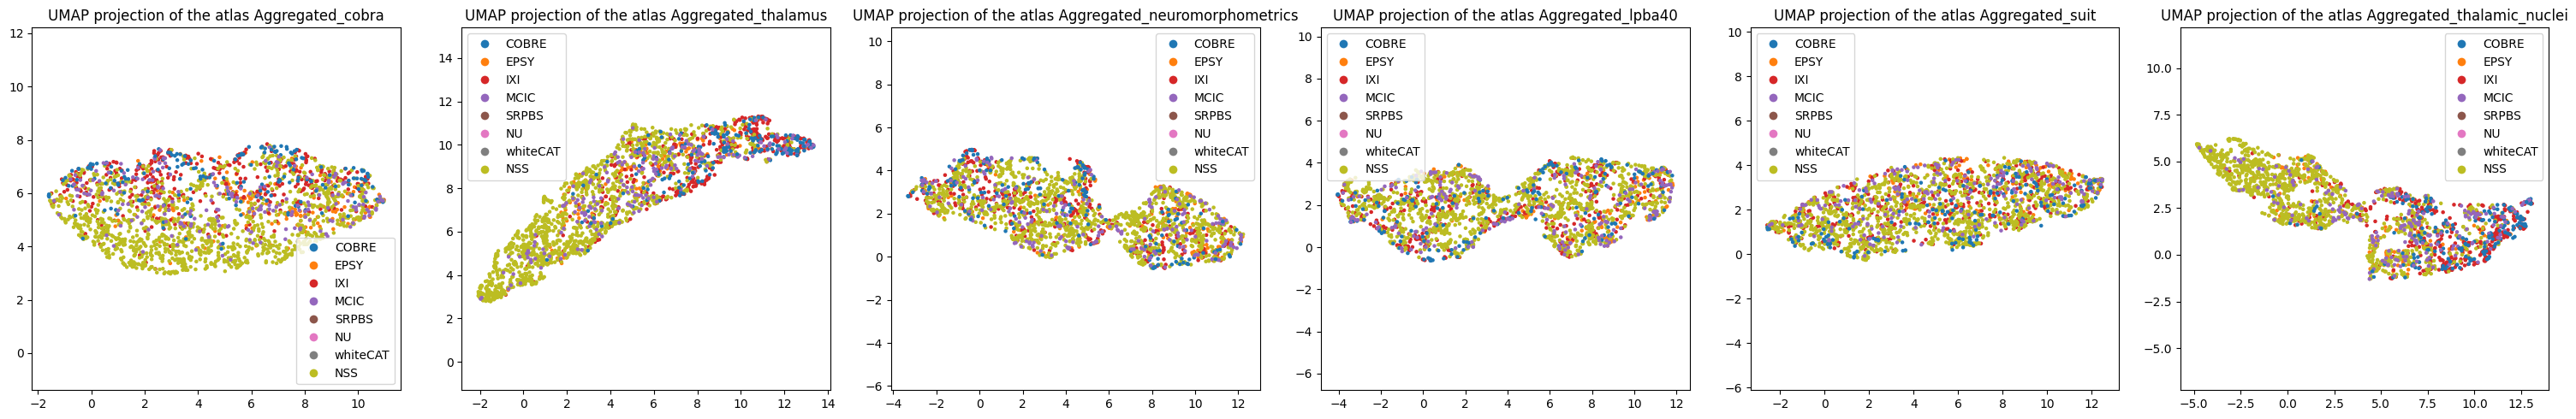

In [106]:
data_overview = pd.read_csv("./metadata_20250110/full_data_train_valid_test.csv")
data_overview = data_overview.drop(columns=['Unnamed: 0'])
data_overview = data_overview[["Filename", "Dataset", "Diagnosis" , "Age", "Sex", "Usage_original", "Sex_int"]].set_index("Filename")

dfs = []
names = []

for path in data_paths:
    df = read_hdf5_to_df(str(path))
    df = df.loc[:, (slice(None), "Vgm")]

    sorted_df = df.copy().sort_index(axis=1).T

    dfs.append(sorted_df)
    names.append(path.stem)

fig, axs = plt.subplots(nrows=1, ncols=len(dfs), figsize=(5*len(dfs), 5))

if len(dfs) == 1:
    axs = [axs]

for idx, (df, name) in enumerate(zip(dfs, names)):
    reducer = umap.UMAP()
    clean_df = df.copy()
    
    filenames = clean_df.index.get_level_values(0)

    datasets = []
    for filename in filenames:
        if filename in list(data_overview.index):
            datasets.append(data_overview.loc[filename, 'Dataset'])
        else:
            datasets.append('Unknown')

    print(len(datasets))
    
    color_map = {"COBRE": 0, "EPSY": 1, "IXI": 3, "MCIC": 4, "SRPBS": 5, "NU": 6, "whiteCAT": 7, "NSS": 8}
    colors = [sns.color_palette()[color_map.get(d, 8)] for d in datasets]

    embedding = reducer.fit_transform(clean_df.values)
    
    axs[idx].set_aspect('equal', 'datalim')
    axs[idx].set_title(f'UMAP projection of the atlas {name}', fontsize=12)

    axs[idx].scatter(
        embedding[:,0],
        embedding[:,1],
        c=colors,
        s=5
    )
    palette = sns.color_palette()
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[0], label='COBRE', markersize=8),
        Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[1], label='EPSY', markersize=8),
        Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[3], label='IXI', markersize=8),
        Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[4], label='MCIC', markersize=8),
        Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[5], label='SRPBS', markersize=8),
        Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[6], label='NU', markersize=8),
        Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[7], label='whiteCAT', markersize=8),
        Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[8], label='NSS', markersize=8),
    ]

    axs[idx].legend(handles=legend_elements, loc='best')

plt.tight_layout()
plt.show()